<a href="https://colab.research.google.com/github/ritamsahu/Student_analysis/blob/main/Student_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Libraries**

Importing the Dependancies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import bokeh.plotting as bp

# **Load Dataset**

In [2]:
# Load the student dataset into a Pandas DataFrame
df = pd.read_excel('/content/student_analysis.xlsx')

# **Statistical Summary**

In [3]:
df.describe()

,Age,Pocket_money,Height,Weight,BMI,family_income_monthly,Distance_home_to_college,Rate your Department (0-10)
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,128.000000
mean,20.062016,2186.046512,159.400419,53.023256,20.194806,11131.782946,14.759690,8.187500
std,1.951570,2092.182032,14.580086,10.210645,5.104923,14511.509357,11.276202,2.490138
min,17.000000,0.000000,62.000000,35.000000,1.630000,2000.000000,1.000000,1.000000
25%,19.000000,500.000000,155.000000,46.000000,17.700000,5000.000000,7.000000,8.000000
50%,20.000000,2000.000000,161.544000,52.000000,20.300000,5000.000000,12.000000,9.000000
75%,21.000000,3000.000000,166.000000,60.000000,23.000000,10000.000000,20.000000,10.000000
max,27.000000,10000.000000,198.120000,83.000000,39.000000,100000.000000,50.000000,10.000000


# **Problem Statement**

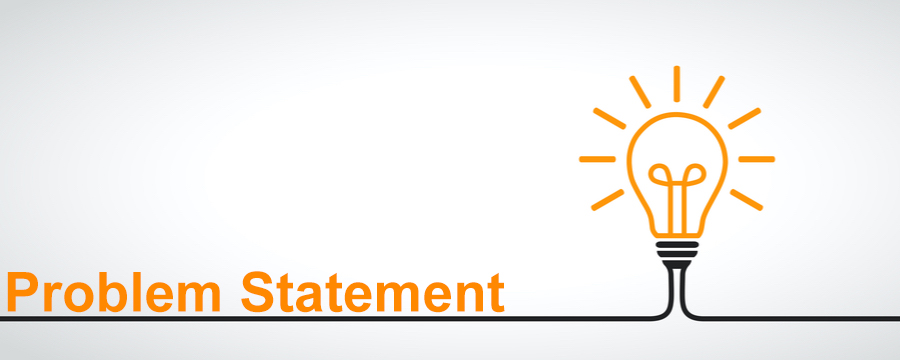

#**Demographic information**

1.   What is the average height and weight of the students in the dataset?
2.  What is the distribution of family income among the students?





In [4]:

# calculate average height and weight
avg_height = df['Height'].mean()
avg_weight = df['Weight'].mean()

# print results
print("Average Height (cm): ", avg_height)
print("Average Weight (kg): ", avg_weight)


Average Height (cm):  159.40041860465118
Average Weight (kg):  53.02325581395349


In [5]:
# Distribution of family income
fig = px.histogram(df, x="family_income_monthly", nbins=50)
fig.show()

Insight: 

*   Majority of the student are coming from Lower Economy calsses.



#**Purpose of Study**



1.   What is the main reason behind the students pursuing higher studies in Zoology?
2.   What percentage of students are pursuing higher studies in Zoology for a Higher Study?






In [6]:
#reason behind the students pursuing higher studies
# count the occurrences of each reason for choosing Zoology
reason_counts = df['Reason_for_choosing_Zoology'].value_counts()

# find the reason with the highest count
main_reason = reason_counts.idxmax()

print("The main reason behind the students pursuing higher studies in Zoology is:", main_reason)


The main reason behind the students pursuing higher studies in Zoology is: I love zoology


In [7]:
reason_counts = df['Reason_for_choosing_Zoology'].value_counts()
reason_counts

I love zoology                 78
Better Scope in research       27
Better job opportunity         20
None of the avobe               3
Not getting desired subject     1
Name: Reason_for_choosing_Zoology, dtype: int64

In [8]:
#percentage of students are pursuing higher studies
reason_counts = df['Reason_for_choosing_Zoology'].value_counts()
fig = px.pie(reason_counts, values=reason_counts.values, names=reason_counts.index, title='Reasons for Choosing Zoology/ purpose of study', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()




# **Study Habits**



1.   How much average time do the students spend on e-learning outside of college hours?
2.   What is the average daily study time for students outside of college hours?
3.   What is average daily study time except college hour for each gender?




In [9]:
# Average students spend time on e-learning outside
def convert_to_hours(time_str):
    if time_str == "Less than 2 hours":
        return 2
    elif time_str == "Less than 5 hours":
        return 5
    else:
        return 0

df['E_learning_time'] = df['E_learning_time'].apply(convert_to_hours)
average_e_learning_time = df["E_learning_time"].mean()

print("Average e-learning time outside of college hours: ",round(average_e_learning_time),"hours")


Average e-learning time outside of college hours:  3 hours


In [10]:
# Average daily study time for students outside of college hours
def convert_to_hours(time_str):
    if time_str == "Less than 2 hours":
        return 2
    elif time_str == "Less than 5 hours":
        return 5
    elif time_str == "Irregular":
        return 1
    else:
        return 0

df['daily_Study_time_except_college_hour'] = df['daily_Study_time_except_college_hour'].apply(convert_to_hours)
average_daily_learning_time = df["daily_Study_time_except_college_hour"].mean()

print("Average daily study time outside of college hours: {:.2f} hours".format(average_daily_learning_time))


Average daily study time outside of college hours: 3.58 hours


In [11]:
#Average daily study time vs Average daily e-learning time
bar_labels = ['Average daily study time outside of college hours', 'Average e-learning time outside of college hours']
bar_values = [average_daily_learning_time, average_e_learning_time]

fig = px.bar(x=bar_labels, y=bar_values,title="Average daily study time vs Average daily e-learning time", color_discrete_sequence=px.colors.sequential.RdBu,height=700,width=900)
fig.show()


**Acquiring knowledge from books**

In [12]:
print("Knowledge from book (minutes): {:.2f}".format((average_daily_learning_time - average_e_learning_time)*60))


Knowledge from book (minutes): 36.28


In [13]:
# Average daily study time except college hour for each gender:
gender_wise_study_time = df.groupby(['Gender'])['daily_Study_time_except_college_hour'].mean()
gender_wise_study_time

Gender
Female    3.855263
Male      3.188679
Name: daily_Study_time_except_college_hour, dtype: float64

Insight: Students are are mainly depends on E-learning

# **College Choice**



1.   What is the most common reason for choosing Zoology as a subject of study?
2.   How many students chose their college based on the availability of Zoology course?




In [14]:
# most common reason for choosing Zoology as a subject
reason_counts = df["Reason_for_choosing_Zoology"].value_counts()
most_common_reason = reason_counts.index[0]

print("Most common reason for choosing Zoology:", most_common_reason)


Most common reason for choosing Zoology: I love zoology


In [15]:
# Students chose their college based on the availability of Zoology course
zoology_count = df[df["Reason_for_choosing_Zoology"] == "I love zoology"].shape[0] # 2 dimension array .shape[0] call 1st dimension of the array

print("Number of students who chose college based on availability of Zoology course:", zoology_count)


Number of students who chose college based on availability of Zoology course: 78


# **Future Career Plans**




1.   How many students plan to continue their higher studies in the same college?
3.   How many B.sc. students plan to continue their higher studies in the same college?
2.   What is the most common reason for not continuing higher studies in the same college?

In [16]:
#continue their higher studies in the same college
all_students_count = df.shape[0]
same_college_count = df[df["Further_study_in_the_same_college"] == "Yes"].shape[0]

percentage = (same_college_count / all_students_count) * 100 
print("Number of students who plan to continue their higher studies in the same college:", same_college_count, "(", "{:.2f}".format(percentage), "%)")



Number of students who plan to continue their higher studies in the same college: 99 ( 76.74 %)


In [17]:
# B.sc. students plan to continue their higher studies in the same college
num_of_BSc_students = df[df['Qualification'] == 'Running B.Sc.'].shape[0]
num_of_BSc_students_continuing_higher_studies = df[(df['Qualification'] == 'Running B.Sc.') & (df['Further_study_in_the_same_college'] == 'Yes')].shape[0]
percentage = (num_of_BSc_students_continuing_higher_studies / num_of_BSc_students) * 100
print("Number of B.Sc. students continuing higher studies in the same college:", num_of_BSc_students_continuing_higher_studies, "(", "{:.2f}".format(percentage), "%)")


Number of B.Sc. students continuing higher studies in the same college: 69 ( 79.31 %)


In [18]:
 #reason for not continuing higher studies in the same college
not_continuing_higher_studies = df[(df['Further_study_in_the_same_college'] == 'No')]

if not not_continuing_higher_studies.empty:
    most_common_reason = not_continuing_higher_studies['reason_for_no'].value_counts().idxmax()
    print("The most common reason for not continuing higher studies in the same college:", most_common_reason)
else:
    print("There are no B.Sc. students who are not continuing higher studies in the same college.")


The most common reason for not continuing higher studies in the same college: I am preparing for competitive exams


In [19]:
#reason for not
most_common_reason = not_continuing_higher_studies['reason_for_no'].value_counts()
most_common_reason

I am preparing for competitive exams                                   2
Better college available                                               2
I want to read from outside                                            2
Want to gain more knowledge                                            2
better colleges are available for higher studies                       1
So long distance journey and also money problem in my house.           1
I require new technique to learn another college.                      1
Try for better opportunity                                             1
There have no BEd course                                               1
I just want to get a job                                               1
There have no B. Ed course                                             1
There have no any  B. Ed course                                        1
Something else                                                         1
I will definitely want to higher in university     

# **Opinion on the syllabus**


1.  What is the general opinion of students about the present syllabus of B.Sc./M.Sc. Zoology?
2.  What percentage of students feel that the syllabus needs upgradation?

In [20]:
# Opinion about the present syllabus 
opinion = df['What do you think about present syllabus of B.Sc./ M.Sc.?'].value_counts()
print(opinion)

Perfect for student            97
Compatible for NET,SET,GATE    17
Need upgradation                7
Overloaded for student          7
Name: What do you think about present syllabus of B.Sc./ M.Sc.?, dtype: int64


In [21]:
opinion = df['What do you think about present syllabus of B.Sc./ M.Sc.?'].value_counts()
fig = px.bar(opinion, x=opinion.index, y=opinion.values, color=opinion.index, title="Opinion about the present syllabus of B.Sc./M.Sc. Zoology")
fig.show()


In [22]:
need_upgradation_count = df[df['What do you think about present syllabus of B.Sc./ M.Sc.?'] == 'Need upgradation'].shape[0]
total_students = df.shape[0]
percentage = (need_upgradation_count / total_students) * 100
print("Percentage of students who feel that the syllabus needs upgradation: ",round(percentage),"%")


Percentage of students who feel that the syllabus needs upgradation:  5 %


# **Employment**


1.  What is the employment status of the students in the dataset?


In [23]:
#Employment status of the students
employment_status = df['Employment_status'].value_counts()

print(employment_status)

Unemployed                     128
Employed(self employed,job)      1
Name: Employment_status, dtype: int64


# **Social media platform**

1.  What is the most popular social media platform among the students?

In [24]:
# Count the number of occurrences of each favorite social media platform
social_media_platform_counts = df['Favorite Social media platform'].value_counts()

# Get the most popular social media platform
most_popular_platform = social_media_platform_counts.index[0]

print('The most popular social media platform is:', most_popular_platform)

The most popular social media platform is: Youtube


In [25]:
fig = px.bar(social_media_platform_counts, x=social_media_platform_counts.index, y=social_media_platform_counts.values, color=social_media_platform_counts.index, title="popular social media platform among the students")
fig.show()

# **Course Affordability**

**Hypothesis**

> If the family income <= 20,000 then student can't afford the course college provide.



In [26]:
# Define a threshold for what can be considered "affordable" pocket money
pocket_money_threshold = 1000

# Define a threshold for what can be considered "affordable" family income
family_income_threshold = 10000

# Define the college fees per month
college_fees_per_month = 1000

# Create a new column indicating whether the student can afford further study
df['Can_afford_further_study'] = (
    (df['Pocket_money'] >= pocket_money_threshold) &
    (df['family_income_monthly'] >= family_income_threshold) &
    (df['family_income_monthly'] >= college_fees_per_month * 12)
)

# Print the result for each student
for i, row in df.iterrows():
    print(f"Student {i+1} can afford further study: {row['Can_afford_further_study']}")





Student 1 can afford further study: True
Student 2 can afford further study: True
Student 3 can afford further study: True
Student 4 can afford further study: False
Student 5 can afford further study: False
Student 6 can afford further study: False
Student 7 can afford further study: False
Student 8 can afford further study: False
Student 9 can afford further study: False
Student 10 can afford further study: False
Student 11 can afford further study: False
Student 12 can afford further study: False
Student 13 can afford further study: False
Student 14 can afford further study: True
Student 15 can afford further study: False
Student 16 can afford further study: False
Student 17 can afford further study: False
Student 18 can afford further study: True
Student 19 can afford further study: True
Student 20 can afford further study: False
Student 21 can afford further study: False
Student 22 can afford further study: False
Student 23 can afford further study: False
Student 24 can afford furt

# **Extra**

In [27]:
pocket_money_value_count=df['Pocket_money'].value_counts()
pocket_money_value_count


3000     34
500      21
1000     20
2000     17
5000      9
0         6
10000     5
1500      4
200       3
250       3
1200      2
700       1
4800      1
4000      1
600       1
650       1
Name: Pocket_money, dtype: int64

In [28]:
Family_income_value_count=df['family_income_monthly'].value_counts()
Family_income_value_count

5000      35
10000     24
3000      21
4000       8
6000       6
60000      4
15000      4
7000       4
30000      3
35000      3
20000      3
25000      2
9000       2
8000       2
50000      1
42000      1
2000       1
4800       1
8500       1
12000      1
3700       1
100000     1
Name: family_income_monthly, dtype: int64

In [29]:
df_low_income = df[(df['family_income_monthly'] <= 5000) & (df['family_income_monthly'] <= 3000)]
pocket_money = df_low_income['Pocket_money']
print(pocket_money)

6       200
8       700
26     3000
29     5000
31     2000
32     2000
40     1000
41     2000
43     2000
52     2000
57     1000
58     2000
61     3000
62     2000
63     2000
69      500
84     2000
93     3000
96      650
120    2000
127    2000
128       0
Name: Pocket_money, dtype: int64
